# Time Series
pandas roots lay in analyzing financial time series data. The author, Wes McKinney was not satisfied with the available tools at the time and decided to build pandas to support his own needs at the hedge fund he was working at. Broadly speaking, time series data is simply points of data gathered over time. Most typically the time is evenly spaced between each data point. pandas has excellent funcitonality with regards to manipulting dates, aggregating over different time periods, sampling different periods of time and much more.

# Date vs Time vs Datetime
In the programming languages for which Python is one, there is a distinction that needs to be made between date, time and datetime. They all three mean different things and though many functions can use these types of times interchangeably its important to know the difference.
* **date** - Just the Month, Day and Year. So 2016-01-01 would represent January 1, 2016 and be considered a 'date'
* **time** - Just the Hours, minutes, seconds and parts of a second (milli/micro/nano). 5 hours, 45 minutes and 6.74234 seconds for example
* **datetime** - A combination of the above two. Has both date (Year, Month, Day) and time (Hour, Minute, Second) components

# Python's date and time functionality
Before jumping into pandas datetime functionality we will look at an important standard library, the [datetime library](https://docs.python.org/3.5/library/datetime.html) which contains many powerful (but not powerful enough) functions to support date, time and datetime manipulation

In [1]:
# this is a standard library so it comes shipped with your python installation. no need to conda install
# bring into our namespace
import datetime

## Create a date, a time and a datetime

In [2]:
# date takes three parameters for the year, month and day
d = datetime.date(2016, 4, 11)
print("date is ", d)

# time takes four parameters: hour, minute, second, microsecond
t = datetime.time(10, 54, 32, 34512)
print("time is", t)

# datetime takes parameters for all of the above
dt = datetime.datetime(2016, 4, 11, 10, 54, 32, 34512)
print("datetime is", dt)

date is  2016-04-11
time is 10:54:32.034512
datetime is 2016-04-11 10:54:32.034512


In [3]:
# The print function makes the above ouput look pretty. 
# Below we just display the objects in the raw form
d, t, dt

(datetime.date(2016, 4, 11),
 datetime.time(10, 54, 32, 34512),
 datetime.datetime(2016, 4, 11, 10, 54, 32, 34512))

In [4]:
# What type are these objects?
type(d), type(t), type(dt)

(datetime.date, datetime.time, datetime.datetime)

In [5]:
# get today's date and datetime
print("Today's date is", datetime.date.today())
print("Today's time is", datetime.datetime.today().time())
print("Today's datetime is", datetime.datetime.today())

Today's date is 2016-12-16
Today's time is 13:44:37.285992
Today's datetime is 2016-12-16 13:44:37.285992


In [6]:
# Get certain properties of date, time, and datetime
d.day, d.month, d.year

(11, 4, 2016)

In [7]:
# What day of the weekday is it? April 11, 2016 was a monday. 
# Monday = 0 Sunday = 6
d.weekday()

0

In [8]:
# properties of datetime
dt.year, dt.hour, dt.microsecond

(2016, 10, 34512)

## Converting strings to datetime and datetime to string
There are two functions, **strftime** and **strptime** which are excellent tools for converting strings to datetime and viceversa
* **strftime** - stands for string format time and is really a method acting on a date, datetime or time object and converts that object into a string. It's one argument is the format you want the string to be
* **strptime** - stands for string parse time and takes two arguments. The time as a string and the format also a string that tells the function what format the time is in.

[The documentation is going to be very helpful](https://docs.python.org/3.5/library/datetime.html#strftime-and-strptime-behavior) here as the formats used in strftime and strptime use something called **directives** to determine the string that matches up with the date and time. 

In [9]:
# Lets start with strftime and convert date, datetime and time into strings

# A directive is preceded immediately by a %. You may insert other characters between each directive
d.strftime("%Y-%m-%d")

'2016-04-11'

In [10]:
# Another more involved directive
d.strftime("Remembering back to %A, %B %d, %Y.... What a fantastic day that was.")

'Remembering back to Monday, April 11, 2016.... What a fantastic day that was.'

In [11]:
# Now lets do strptime
# This takes a string and a format of directives and converts it to a python datetime object

In [12]:
datetime.datetime.strptime("2016-01-05", "%Y-%m-%d")

datetime.datetime(2016, 1, 5, 0, 0)

In [13]:
# an example where month, day, year, minute and hour are smashed together
datestring = "011020160542"
datetime.datetime.strptime(datestring, "%m%d%Y%H%M")

datetime.datetime(2016, 1, 10, 5, 42)

# Date and Datetime addition
It's possible to add an amount of time to a date or datetime object using the timedelta function. timedelta simply produces some amount of time measured in days, seconds and microsends. You can then use this object to add to date or datetime objets

In [14]:
# timedelta can take many arguments
# days, seconds, microseconds, milliseconds, minutes, hours, weeks=
td = datetime.timedelta(seconds = 5000) 

In [15]:
# add to datetime
dt + td

datetime.datetime(2016, 4, 11, 12, 17, 52, 34512)

In [16]:
# original
dt

datetime.datetime(2016, 4, 11, 10, 54, 32, 34512)

In [17]:
# add to date
d + td

datetime.date(2016, 4, 11)

In [18]:
# original date. Nothing changed since 5000 seconds wasn't long enough to make an extra day
d

datetime.date(2016, 4, 11)

In [19]:
# now there is a change
d + datetime.timedelta(days = 5)

datetime.date(2016, 4, 16)

In [20]:
# add weeks
a = dt + datetime.timedelta(weeks = 72, days = 4, hours = 44)

In [21]:
# the difference between the underlying string representation and the print function
print(a.__repr__())
print(a)
a

datetime.datetime(2017, 9, 3, 6, 54, 32, 34512)
2017-09-03 06:54:32.034512


datetime.datetime(2017, 9, 3, 6, 54, 32, 34512)

# Here comes pandas
One of the limitations of the datetime object is that it is 'only' gives precision to microseconds (a millionth of a second). Instead of the datetime object pandas uses numpy's datetime64 and timedelta64 objects which give precision down to the nanosecond (a billionth of a second). This new objects are called **Timestamp** and **Timedelta**.

In [22]:
# import pandas in to begin
import pandas as pd
import numpy as np

## Two main ways to create Timestamps
* pd.Timestamp - Turns strings, ints/floats since epoch and datetime objects into Timestamps
* pd.to_datetime - Same arguments as above but much greater power with arguments for turning strings into Timestamps

In [23]:
# create a timestamp with nanoseconds
# the 'T' in the middle separates the date from the time
ts = pd.Timestamp('2016-01-05T05:34:43.123456789')
ts

Timestamp('2016-01-05 05:34:43.123456789')

In [24]:
# Switch month and year. to_datetime has addtional functionality. Check arguments for more
pd.to_datetime('05-01-2016', dayfirst=True)

Timestamp('2016-01-05 00:00:00')

In [25]:
# use same directives as datetime objects for more complex arrangements of dates
pd.to_datetime("01-2016-05", format="%m-%Y-%d")

Timestamp('2016-01-05 00:00:00')

In [26]:
# grab some attributes. More functionality than Python's datetime
ts.hour, ts.day, ts.second, ts.nanosecond, ts.dayofweek, ts.days_in_month

(5, 5, 43, 789, 1, 31)

In [27]:
# convert to datetime. Nanoseconds get chopped off
ts.to_datetime()

C:\Anaconda2\envs\py35\lib\site-packages\IPython\core\interactiveshell.py:2881: FutureWarning: to_datetime is deprecated. Use self.to_pydatetime()
  exec(code_obj, self.user_global_ns, self.user_ns)


datetime.datetime(2016, 1, 5, 5, 34, 43, 123456)

In [28]:
# its already datetime64 but to explicity make it a numpy object
ts.to_datetime64()

numpy.datetime64('2016-01-05T05:34:43.123456789')

In [29]:
# check timestamp type
type(ts)

pandas.tslib.Timestamp

## Timestamp addition/subtraction with Timedelta64
The Timedelta64 object works similary to timedelta from the datetime library.

In [30]:
td64 = pd.Timedelta(weeks = 5, days = 10, nanoseconds = 190)
td64

Timedelta('45 days 00:00:00.000000')

In [31]:
# add the time delta
ts + td64

Timestamp('2016-02-19 05:34:43.123456979')

In [32]:
# subtract a multiple of the time delta
ts - 100 * td64

Timestamp('2003-09-10 05:34:43.123437789')

## Creating date ranges with pd.date_range
Creating single dates is usually not what you will be doing in pandas. The **date_range** function gives you the ability to create very precise and varied ranges of Timestamps. 

A couple common ways of making a range of dates are outlined below
* Supply the start and end dates along with a frequency
* Supply exactly one of start or end date and then give the number of periods and frequency

Start and end dates can be strings or datetime/Timestamp objects

In [33]:
# give start and end dates and generate each day
# notice that the type of each object is datetime64 and there arer 152 days and the frequency is days
# Also notice the type of the whole range is of DatetimeIndex and not a list. pandas does some extra work to
# make the DatetimeIndex faster and more powerful than a list
pd.date_range(start="2016-01-01", end="2016-05-31", freq='D')

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2016-05-22', '2016-05-23', '2016-05-24', '2016-05-25',
               '2016-05-26', '2016-05-27', '2016-05-28', '2016-05-29',
               '2016-05-30', '2016-05-31'],
              dtype='datetime64[ns]', length=152, freq='D')

In [34]:
# Do the same range except only do business days
pd.date_range(start="2016-01-01", end="2016-05-31", freq='B')

DatetimeIndex(['2016-01-01', '2016-01-04', '2016-01-05', '2016-01-06',
               '2016-01-07', '2016-01-08', '2016-01-11', '2016-01-12',
               '2016-01-13', '2016-01-14',
               ...
               '2016-05-18', '2016-05-19', '2016-05-20', '2016-05-23',
               '2016-05-24', '2016-05-25', '2016-05-26', '2016-05-27',
               '2016-05-30', '2016-05-31'],
              dtype='datetime64[ns]', length=108, freq='B')

## Where are these frequencies coming from?
Those frequencies are called offsets and determine at what intervals the date range will output. The table below shows all the possibily offsets and their aliases (what you will use)

<table border="1" class="docutils">
<colgroup>
<col width="13%" />
<col width="87%" />
</colgroup>
<thead valign="bottom">
<tr class="row-odd"><th class="head">Alias</th>
<th class="head">Description</th>
</tr>
</thead>
<tbody valign="top">
<tr class="row-even"><td>B</td>
<td>business day frequency</td>
</tr>
<tr class="row-odd"><td>C</td>
<td>custom business day frequency (experimental)</td>
</tr>
<tr class="row-even"><td>D</td>
<td>calendar day frequency</td>
</tr>
<tr class="row-odd"><td>W</td>
<td>weekly frequency</td>
</tr>
<tr class="row-even"><td>M</td>
<td>month end frequency</td>
</tr>
<tr class="row-odd"><td>BM</td>
<td>business month end frequency</td>
</tr>
<tr class="row-even"><td>CBM</td>
<td>custom business month end frequency</td>
</tr>
<tr class="row-odd"><td>MS</td>
<td>month start frequency</td>
</tr>
<tr class="row-even"><td>BMS</td>
<td>business month start frequency</td>
</tr>
<tr class="row-odd"><td>CBMS</td>
<td>custom business month start frequency</td>
</tr>
<tr class="row-even"><td>Q</td>
<td>quarter end frequency</td>
</tr>
<tr class="row-odd"><td>BQ</td>
<td>business quarter endfrequency</td>
</tr>
<tr class="row-even"><td>QS</td>
<td>quarter start frequency</td>
</tr>
<tr class="row-odd"><td>BQS</td>
<td>business quarter start frequency</td>
</tr>
<tr class="row-even"><td>A</td>
<td>year end frequency</td>
</tr>
<tr class="row-odd"><td>BA</td>
<td>business year end frequency</td>
</tr>
<tr class="row-even"><td>AS</td>
<td>year start frequency</td>
</tr>
<tr class="row-odd"><td>BAS</td>
<td>business year start frequency</td>
</tr>
<tr class="row-even"><td>BH</td>
<td>business hour frequency</td>
</tr>
<tr class="row-odd"><td>H</td>
<td>hourly frequency</td>
</tr>
<tr class="row-even"><td>T, min</td>
<td>minutely frequency</td>
</tr>
<tr class="row-odd"><td>S</td>
<td>secondly frequency</td>
</tr>
<tr class="row-even"><td>L, ms</td>
<td>milliseconds</td>
</tr>
<tr class="row-odd"><td>U, us</td>
<td>microseconds</td>
</tr>
<tr class="row-even"><td>N</td>
<td>nanoseconds</td>
</tr>
</tbody>
</table>

In [35]:
# Do the same thing except for business end of month
# only 5 months here
pd.date_range(start="2016-01-01", end="2016-05-31", freq='BM')

DatetimeIndex(['2016-01-29', '2016-02-29', '2016-03-31', '2016-04-29',
               '2016-05-31'],
              dtype='datetime64[ns]', freq='BM')

In [36]:
# use the periods argument to specify how many dates you want.
# Specify only one of either start or end date
pd.date_range(start="2016-01-10", periods=10, freq='W')

DatetimeIndex(['2016-01-10', '2016-01-17', '2016-01-24', '2016-01-31',
               '2016-02-07', '2016-02-14', '2016-02-21', '2016-02-28',
               '2016-03-06', '2016-03-13'],
              dtype='datetime64[ns]', freq='W-SUN')

## An actual time series
So far we have been playing around with standard Python and pandas date functionality without any data attached to the dates. We will now begin to explore slicing a Series of time series data.

In [37]:
# get a year and a half of business day data
idx = pd.date_range(start='2014-01-01', end='2015-06-30', freq='B')
s = pd.Series(np.random.rand(len(idx)), idx)

In [38]:
s.head(15)

2014-01-01    0.963172
2014-01-02    0.684256
2014-01-03    0.885976
2014-01-06    0.155341
2014-01-07    0.221819
2014-01-08    0.954248
2014-01-09    0.511779
2014-01-10    0.471050
2014-01-13    0.686189
2014-01-14    0.685059
2014-01-15    0.158288
2014-01-16    0.347547
2014-01-17    0.856384
2014-01-20    0.736757
2014-01-21    0.166387
Freq: B, dtype: float64

## taking and slicing data with [ ]
We have a series of random data with a DatetimeIndex. It was stressed that using the brackets [] with series is not good practice but when you have a DatetimeIndex we can relax this as the index is not going to be ambiguous.

In [39]:
# Get a single date with []
s['2014-01-17']

0.85638403615333558

In [40]:
# Get a range of dates by using slice notation
# since january 18th is not in the series it simply doesn't return a value for it
s['2014-01-18':'2014-02-5']

2014-01-20    0.736757
2014-01-21    0.166387
2014-01-22    0.457541
2014-01-23    0.798148
2014-01-24    0.282083
2014-01-27    0.251170
2014-01-28    0.531384
2014-01-29    0.396481
2014-01-30    0.042569
2014-01-31    0.412776
2014-02-03    0.241579
2014-02-04    0.021288
2014-02-05    0.066083
Freq: B, dtype: float64

In [41]:
# get an entire month
s['2015-02']

2015-02-02    0.734741
2015-02-03    0.080402
2015-02-04    0.753246
2015-02-05    0.544998
2015-02-06    0.445957
2015-02-09    0.343954
2015-02-10    0.675633
2015-02-11    0.643203
2015-02-12    0.937176
2015-02-13    0.303267
2015-02-16    0.147870
2015-02-17    0.782050
2015-02-18    0.209569
2015-02-19    0.205785
2015-02-20    0.469429
2015-02-23    0.394587
2015-02-24    0.162697
2015-02-25    0.233041
2015-02-26    0.661579
2015-02-27    0.833456
Freq: B, dtype: float64

In [42]:
# get an entire year
s['2014'].tail(10)

2014-12-18    0.532983
2014-12-19    0.237397
2014-12-22    0.149389
2014-12-23    0.556182
2014-12-24    0.692721
2014-12-25    0.469643
2014-12-26    0.765831
2014-12-29    0.746698
2014-12-30    0.861509
2014-12-31    0.594715
Freq: B, dtype: float64

In [43]:
# .loc will do the same thing with extra syntax
s.loc['2014-01-18':'2014-02-5']

2014-01-20    0.736757
2014-01-21    0.166387
2014-01-22    0.457541
2014-01-23    0.798148
2014-01-24    0.282083
2014-01-27    0.251170
2014-01-28    0.531384
2014-01-29    0.396481
2014-01-30    0.042569
2014-01-31    0.412776
2014-02-03    0.241579
2014-02-04    0.021288
2014-02-05    0.066083
Freq: B, dtype: float64

## Shifting a Series up or down
The **shift** and **tshift** methods can shift a Series up or down. shift moves the values of the series while tshift changes the values of the index to a different date.

In [44]:
# original series
s.head(10)

2014-01-01    0.963172
2014-01-02    0.684256
2014-01-03    0.885976
2014-01-06    0.155341
2014-01-07    0.221819
2014-01-08    0.954248
2014-01-09    0.511779
2014-01-10    0.471050
2014-01-13    0.686189
2014-01-14    0.685059
Freq: B, dtype: float64

In [45]:
# use shift to shift the values up 5 days
# the index stays the same and missing values appear where there is no previous data
s.shift(5).head(10)

2014-01-01         NaN
2014-01-02         NaN
2014-01-03         NaN
2014-01-06         NaN
2014-01-07         NaN
2014-01-08    0.963172
2014-01-09    0.684256
2014-01-10    0.885976
2014-01-13    0.155341
2014-01-14    0.221819
Freq: B, dtype: float64

In [46]:
# down shift 3 days
# by looking at the tail we see that the last three values are missing
s.shift(-3).tail(10)

2015-06-17    0.157379
2015-06-18    0.277657
2015-06-19    0.251736
2015-06-22    0.079548
2015-06-23    0.789118
2015-06-24    0.844947
2015-06-25    0.023437
2015-06-26         NaN
2015-06-29         NaN
2015-06-30         NaN
Freq: B, dtype: float64

In [47]:
# This will shift 3 BUSINESS days or whatever the original frequency was. 
# notice how only the index was changed
s.tshift(3).head()

2014-01-06    0.963172
2014-01-07    0.684256
2014-01-08    0.885976
2014-01-09    0.155341
2014-01-10    0.221819
Freq: B, dtype: float64

In [48]:
# Shift three normal days
# notice how the index is different than the series ouput above
s.tshift(3, freq='D').head()

2014-01-04    0.963172
2014-01-05    0.684256
2014-01-06    0.885976
2014-01-09    0.155341
2014-01-10    0.221819
Freq: B, dtype: float64

## Sampling a particular frequency of your time series data
Occasionally during a time series analysis you would want to grab a small, regular repeating fraction of your data. Every friday, or every other tuesday or every end of business quarter. The **asfreq** method allows for this flexibility and coupled with **anchored offsets** provides some nifty time slices can be grabbed.

In [49]:
# keep using the same time series from above and grab the end of each business month
# note how pandas automatically picks the last business day and not last day of each month for you
s.asfreq(freq='BM')

2014-01-31    0.412776
2014-02-28    0.181780
2014-03-31    0.343771
2014-04-30    0.374570
2014-05-30    0.145124
2014-06-30    0.910410
2014-07-31    0.843175
2014-08-29    0.260153
2014-09-30    0.911654
2014-10-31    0.390163
2014-11-28    0.845641
2014-12-31    0.594715
2015-01-30    0.176660
2015-02-27    0.833456
2015-03-31    0.690647
2015-04-30    0.807859
2015-05-29    0.049075
2015-06-30    0.023437
Freq: BM, dtype: float64

### Using Anchored offsets
[An anchored offset](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#anchored-offsets) allows for a particular frequency to be anchored to a specific day/month. It is most commonly used with frequencies in weeks to determine the start or end of that week

In [50]:
# get one data per week
# But which one does pandas default to?
# Look closely at the bottom. Freq: W-SUN means it gets the value of the series for each sunday in the week
# Since this data has only business days, there will be no values for Sunday
s.asfreq("W").head(10)

2014-01-05   NaN
2014-01-12   NaN
2014-01-19   NaN
2014-01-26   NaN
2014-02-02   NaN
2014-02-09   NaN
2014-02-16   NaN
2014-02-23   NaN
2014-03-02   NaN
2014-03-09   NaN
Freq: W-SUN, dtype: float64

In [51]:
# lets fix this by getting the value of friday for each week
s.asfreq('W-FRI').head(10)

2014-01-03    0.885976
2014-01-10    0.471050
2014-01-17    0.856384
2014-01-24    0.282083
2014-01-31    0.412776
2014-02-07    0.039452
2014-02-14    0.479034
2014-02-21    0.781859
2014-02-28    0.181780
2014-03-07    0.169043
Freq: W-FRI, dtype: float64

In [52]:
# How about every third Wednesday?
# pretty amazing
s.asfreq('3W-WED')

2014-01-01    0.963172
2014-01-22    0.457541
2014-02-12    0.233835
2014-03-05    0.098506
2014-03-26    0.254517
2014-04-16    0.794471
2014-05-07    0.422310
2014-05-28    0.530322
2014-06-18    0.038440
2014-07-09    0.175516
2014-07-30    0.596095
2014-08-20    0.991113
2014-09-10    0.741384
2014-10-01    0.929120
2014-10-22    0.780366
2014-11-12    0.774984
2014-12-03    0.304421
2014-12-24    0.692721
2015-01-14    0.753311
2015-02-04    0.753246
2015-02-25    0.233041
2015-03-18    0.968105
2015-04-08    0.594805
2015-04-29    0.331913
2015-05-20    0.816162
2015-06-10    0.435586
Freq: 3W-WED, dtype: float64

In [53]:
# How about every 5 hours?
# most of these dates don't correspond with data
s.asfreq('5H').head(15)

2014-01-01 00:00:00    0.963172
2014-01-01 05:00:00         NaN
2014-01-01 10:00:00         NaN
2014-01-01 15:00:00         NaN
2014-01-01 20:00:00         NaN
2014-01-02 01:00:00         NaN
2014-01-02 06:00:00         NaN
2014-01-02 11:00:00         NaN
2014-01-02 16:00:00         NaN
2014-01-02 21:00:00         NaN
2014-01-03 02:00:00         NaN
2014-01-03 07:00:00         NaN
2014-01-03 12:00:00         NaN
2014-01-03 17:00:00         NaN
2014-01-03 22:00:00         NaN
Freq: 5H, dtype: float64

# 'Resampling' - aggregating data over certain time frequencies
Many times, it will be necessary to aggregate time series data over a certain regular interval of time. Aggregating meaning that a function will be applied to an interval of a time series to produce a single number. Summing the total values over a month, or finding the mean of every 2 week period, or finding the max value over each year, etc... pandas uses the confusing (in my opinion) term 'resampling' to denote this aggregation over a time period.

In [54]:
# get the max value each week
s.resample('W').max().head()

2014-01-05    0.963172
2014-01-12    0.954248
2014-01-19    0.856384
2014-01-26    0.798148
2014-02-02    0.531384
Freq: W-SUN, dtype: float64

In [55]:
# get the mean each month
s.resample('M').mean()

2014-01-31    0.506800
2014-02-28    0.381818
2014-03-31    0.507752
2014-04-30    0.469148
2014-05-31    0.553135
2014-06-30    0.473468
2014-07-31    0.521752
2014-08-31    0.532046
2014-09-30    0.541247
2014-10-31    0.517816
2014-11-30    0.521209
2014-12-31    0.520835
2015-01-31    0.527086
2015-02-28    0.478132
2015-03-31    0.475956
2015-04-30    0.536809
2015-05-31    0.421195
2015-06-30    0.422516
Freq: M, dtype: float64

In [56]:
# Get the mean each business month 
s.resample('BM').mean()

2014-01-31    0.506800
2014-02-28    0.381818
2014-03-31    0.507752
2014-04-30    0.469148
2014-05-30    0.553135
2014-06-30    0.473468
2014-07-31    0.521752
2014-08-29    0.532046
2014-09-30    0.541247
2014-10-31    0.517816
2014-11-28    0.521209
2014-12-31    0.520835
2015-01-30    0.527086
2015-02-27    0.478132
2015-03-31    0.475956
2015-04-30    0.536809
2015-05-29    0.421195
2015-06-30    0.422516
Freq: BM, dtype: float64

In [57]:
# the last two examples give the same exact values
(s.resample('BM').mean().values == s.resample('M').mean().values).all()

True

In [58]:
# get max over a year
s.resample('A').max()

2014-12-31    0.994445
2015-12-31    0.988469
Freq: A-DEC, dtype: float64

In [59]:
# sample every 6 hours

# first save a sa resmaple object
r = s.resample('6H')

In [60]:
# view the raw resample before aggregation
# lots of missing values as only time 00:00:00 will have any values
r.asfreq().head(15)

2014-01-01 00:00:00    0.963172
2014-01-01 06:00:00         NaN
2014-01-01 12:00:00         NaN
2014-01-01 18:00:00         NaN
2014-01-02 00:00:00    0.684256
2014-01-02 06:00:00         NaN
2014-01-02 12:00:00         NaN
2014-01-02 18:00:00         NaN
2014-01-03 00:00:00    0.885976
2014-01-03 06:00:00         NaN
2014-01-03 12:00:00         NaN
2014-01-03 18:00:00         NaN
2014-01-04 00:00:00         NaN
2014-01-04 06:00:00         NaN
2014-01-04 12:00:00         NaN
Freq: 6H, dtype: float64

In [61]:
# linearly interpolate values from one known value to the next
r.interpolate().head(15)

2014-01-01 00:00:00    0.963172
2014-01-01 06:00:00    0.893443
2014-01-01 12:00:00    0.823714
2014-01-01 18:00:00    0.753985
2014-01-02 00:00:00    0.684256
2014-01-02 06:00:00    0.734686
2014-01-02 12:00:00    0.785116
2014-01-02 18:00:00    0.835546
2014-01-03 00:00:00    0.885976
2014-01-03 06:00:00    0.825090
2014-01-03 12:00:00    0.764203
2014-01-03 18:00:00    0.703317
2014-01-04 00:00:00    0.642431
2014-01-04 06:00:00    0.581545
2014-01-04 12:00:00    0.520658
Freq: 6H, dtype: float64

In [62]:
# Aggregate by every 3rd week and use the 'agg' method to find many different aggregates
s.resample('3W').agg(['mean', 'max', 'std', lambda x: x.max() - x.min()]).head(15)

,mean,max,std,<lambda>
2014-01-05,0.844468,0.963172,0.144016,0.278915
2014-01-26,0.499241,0.954248,0.273202,0.798907
2014-02-16,0.261356,0.531384,0.164719,0.510096
2014-03-09,0.456435,0.981284,0.342198,0.945457
2014-03-30,0.588193,0.927036,0.258731,0.803919
2014-04-20,0.471341,0.987357,0.316767,0.904258
2014-05-11,0.462116,0.994445,0.291096,0.927022
2014-06-01,0.588809,0.922308,0.244832,0.777184
2014-06-22,0.439154,0.970375,0.231199,0.931935
2014-07-13,0.563919,0.959827,0.369267,0.951775


# Rolling Window Calculations
Often in time series analysis a continuous rolling window of time will be desired. This is similar to resampling except that each time period has its own window and so the same number of time periods will be returned when a calculation is performed on that window of data.

### Get real stock market data
A pandas extension package, **pandas_datareader** can be installed using **conda install pandas_datareader**. This package allows grabbing financial data from the web.

In [63]:
from pandas_datareader.data import DataReader

In [64]:
# general form for DataReader
# get apple stock from 2012 til present
aapl = DataReader('AAPL', data_source='google', start='2012-01-01')
aapl.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,58.49,58.93,58.43,58.75,75564699
2012-01-04,58.57,59.24,58.47,59.06,65061108
2012-01-05,59.28,59.79,58.95,59.72,67816805
2012-01-06,59.97,60.39,59.89,60.34,79596412
2012-01-09,60.79,61.11,60.19,60.25,98505792
2012-01-10,60.84,60.86,60.21,60.46,64581762
2012-01-11,60.38,60.41,59.90,60.36,53798059
2012-01-12,60.33,60.41,59.82,60.20,53180911
2012-01-13,59.96,60.06,59.81,59.97,56539749


In [65]:
# two tech stocks and two oil stocks
stocks = ['AAPL', 'GOOG', 'HOS', 'SLB']


# Grab 4.5 years of stock closing price data from google finance
stock_data = {stock: DataReader(stock, data_source='google', start='2012-01-01')['Close'] for stock in stocks}
df = pd.DataFrame(stock_data, columns=stocks)
df.head(10)

,AAPL,GOOG,HOS,SLB
Date,,,,
2012-01-03,58.75,332.37,31.46,70.09
2012-01-04,59.06,333.81,31.76,69.56
2012-01-05,59.72,329.18,32.21,68.07
2012-01-06,60.34,324.68,33.80,67.78
2012-01-09,60.25,310.92,32.78,68.82
2012-01-10,60.46,311.26,33.59,70.75
2012-01-11,60.36,312.67,33.29,70.16
2012-01-12,60.20,314.51,32.98,69.70
2012-01-13,59.97,312.18,33.53,67.99


In [66]:
# Lets plot this
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
plt.style.use("ggplot")

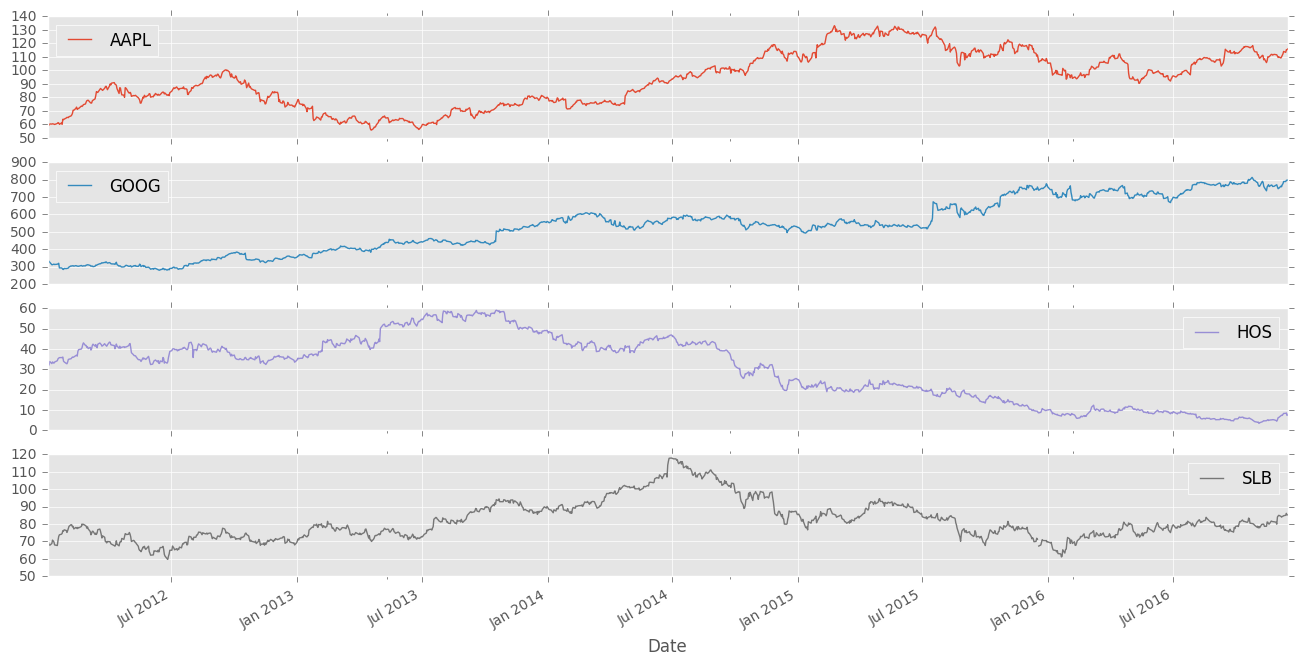

In [68]:
ax = df.plot(subplots=True, figsize=(16,8));

### Create a rolling object
**rolling** is both a Series and DataFrame method thats main input is the number of time periods to look back at each date before performing the calculation.

In [78]:
# Initialize rolling object by looking back at the last 10 obsrevations
r = df.rolling(10)

In [79]:
# Find the rolling mean of the last 10 observations
# The first 9 observations are missing since there wasn't 10 historical points yet
r.mean().head(15)

,AAPL,GOOG,HOS,SLB
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN
2012-01-06,NaN,NaN,NaN,NaN
2012-01-09,NaN,NaN,NaN,NaN
2012-01-10,NaN,NaN,NaN,NaN
2012-01-11,NaN,NaN,NaN,NaN
2012-01-12,NaN,NaN,NaN,NaN
2012-01-13,NaN,NaN,NaN,NaN


In [82]:
# Manually check for correctness
# Its correct! The values match
df[:10].mean()

AAPL     59.978
GOOG    319.556
HOS      32.961
SLB      69.056
dtype: float64

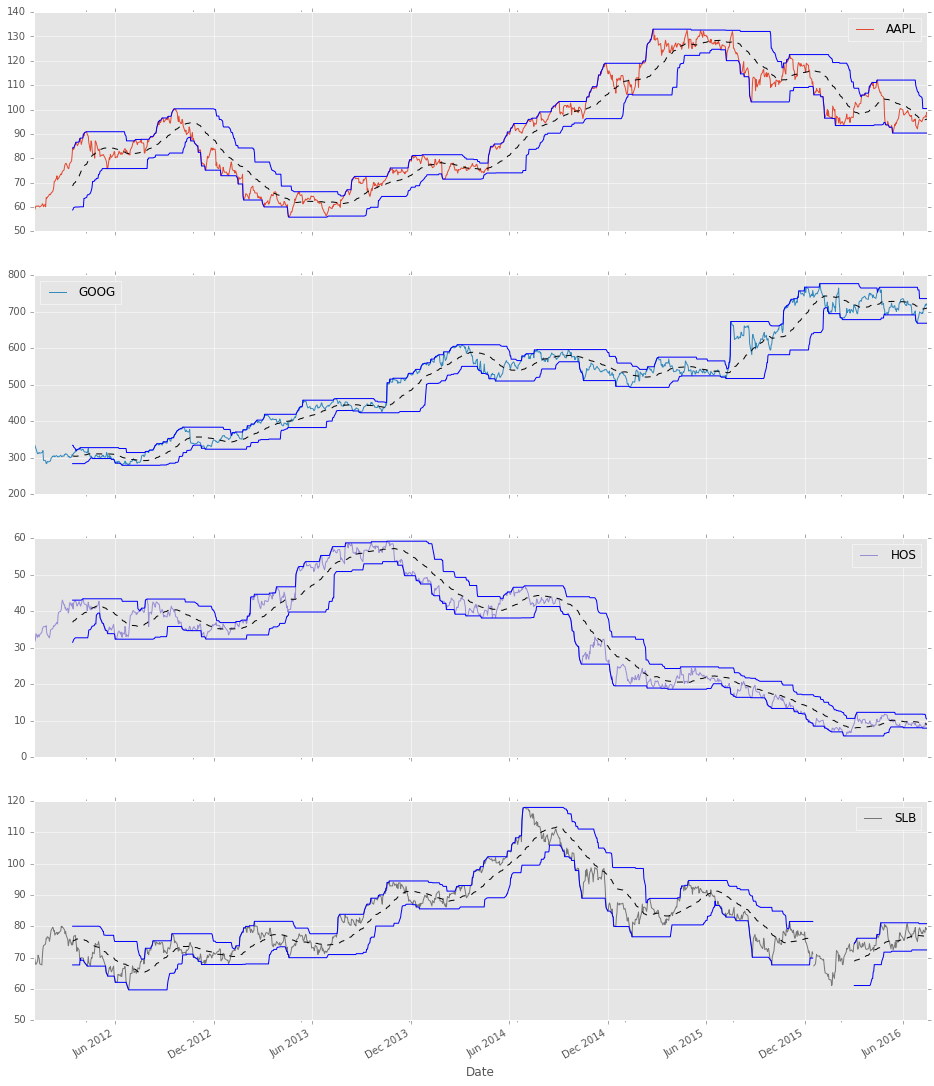

In [97]:
# plot the rolling mean, max, min with a window of 50
axs = df.plot(subplots=True, figsize=(16,20));
for i, axes in enumerate(axs):
    axes.plot(df.iloc[:, i].rolling(50).mean(), color='black', linestyle="--")
    axes.plot(df.iloc[:, i].rolling(50).max(), color='blue', linestyle="-")
    axes.plot(df.iloc[:, i].rolling(50).min(), color='blue', linestyle="-")

# Two other rolling window methods
There exist an exponentially weighted moving window, **ewm** and an exapnding moving window, **expanding**. Both of these are Series and DataFrame methods that can be used for a similar analysis as the one above.

# Quick Summary
* Know the difference between a date, time, and datetime
* Be able to create dates, times, and datetimes in the datetime standard library
* Extract important attributes (hour, minute, year, second) from datetime objects
* Use strftime to convert a datetime to a string using directives
* Use strptime to convert a string to a datetime also using directives
* Use timedelta to add/subtract to a datetime object
* Know the difference between datetime and datetime64
* Nanosecond vs Microsecond
* Create a Timestamp in pandas with pd.Timestamp and pd.to_datetime
* Create a date range using periods or frequency
* Slice a DatetimeIndex with []
* Shift a Series with a DatetimeIndex
* Be aware of the date offset aliases like 'W' for week and 'BM' for end of business month
* Use time series method .asfreq to sample data at regular intervals
* Use resampling to aggregate your data over regular intervals
* Use anchored offsets (mainly the days of the week) to specificy a more specific interval
* Use pandas_datareader to load financial data
* Create rolling objects with the rolling Series and DataFrame method

## Problem 1
<span  style="color:green; font-size:16px">Create a datetime object with values for both the date and time part and extract the date and time into separate variables. Can you add the date and time objects together to get the same datetime object?</span>

In [113]:
# your code here

## Problem 2
<span  style="color:green; font-size:16px">Create a datetime object from today's date and add to it 6 hours 42 minutes and 123456 microseconds</span>

In [114]:
# your code here

## Problem 3
<span  style="color:green; font-size:16px">Write a list comprehension that contains 100 elements with each element being the current datetime (of the execution of that list comprehension iteration)</span>

In [ ]:
# your code here

## Problem 4
<span  style="color:green; font-size:16px">Put the list from problem 3 into a Series and then find the average difference between iterations. You may have to google how to find the difference between values in a Series.</span>

In [ ]:
# your code here

## Problem 5
<span  style="color:green; font-size:16px">Use the datetime library to convert "2016bbb12---15" into a date</span>

In [120]:
# your code here
convert_me = "2016bbb12---15"

## Problem 6
<span  style="color:green; font-size:16px">Convert the date below to "On Friday July the 8th, 2016 it was very hot. </span>

In [131]:
# your code here
d = datetime.datetime(2016, 7, 8)

## Problem 7
<span  style="color:green; font-size:16px"> Create a pandas Timestamp out of a datetime object</span>

In [122]:
# your code here

## Problem 8
<span  style="color:green; font-size:16px"> Using the datetime library, find out how many days you have been alive. Save this to the variable `days_alive`</span>

In [130]:
# your code here

## Problem 9
<span  style="color:green; font-size:16px">It's possible to divide two timedelta objects together. With that information,  use pd.Timedelta to find out how many nanoseconds you have been alive for.</span>

In [133]:
# your code here

## Problem 10
<span  style="color:green; font-size:16px">What day of the week was October 12, 1492?</span>

In [134]:
# your code here

## Problem 11
<span  style="color:green; font-size:16px">Create a range of dates using pandas that span at least a couple years without using the `start` argument and using a different frequency than `days`. What is the type of object that was created?</span>

In [136]:
# your code here

## Problem 12
<span  style="color:green; font-size:16px">Investigate the DatetimeIndex object you created in problem 11. Use the dot notation along with pressing tab to view many of the methods. Explore several methods including the ones that begin with `is_...`</span>

In [ ]:
# your code here

## Problem 13
<span  style="color:green; font-size:16px">Create a series with the above DatetimeIndex as the index. Fill the index with the cumulative sum of an array of random normal numpy variables. Save this series to variable `s`. It will be used for the next several problems.</span>

In [137]:
# your code here

## Problem 14
<span  style="color:green; font-size:16px">Slice the series from problem 13 from one date to another by 4</span>

In [139]:
# your code here

## Problem 15
<span  style="color:green; font-size:16px">Use the `asfreq` method on the series above to sample using a less frequent date offset. If your offset is currently weeks, take a sample of months or two weeks.</span>

In [140]:
# your code here

## Problem 16
<span  style="color:green; font-size:16px">Do the opposite of 16. Use the method `asfreq` to sample a more frequent date offset. Remove the missing values with by utilizing the `pad` argument.</span>

In [141]:
# your code here

## Problem 17
<span  style="color:green; font-size:16px">Aggregate your data by using the resample method. Use 5 of your date offsets as the size of your group. Find the median for each group.</span>

In [142]:
# your code here

## Problem 18
<span  style="color:green; font-size:16px">Plot the aggregated data along with the original data on the same plot.</span>

In [144]:
# your code here

# Mini-Project: Predicting the Stock Market using Simple Rules
In this project we will explore making predictions on the stock market using simple rules. How simple is the rule? What if we had to choose to buy or short some stock every monday and close out our position by selling or buying on Friday based on what happened the week before. If the stock went up the week before we buy on Monday. If it went down the week before we sell.

Let's choose a stock and test this theory. After we test this theory, you will come up with your own theory based on a different rule and try and find something that works and then of course implement it in real life.

In [154]:
# first lets get some historical data from McDonalds stock
mcd = DataReader('MCD', 'google', start='2012-1-1')['Close']

In [162]:
mcd.head(10)

Date
2012-01-03     98.84
2012-01-04     99.39
2012-01-05     99.83
2012-01-06    100.60
2012-01-09     99.64
2012-01-10     99.70
2012-01-11     99.93
2012-01-12    100.57
2012-01-13    100.35
2012-01-17    100.55
Name: Close, dtype: float64

In [213]:
# take a look at raw gain/loss
mcd.resample('W-FRI').agg(lambda x: x[-1] - x[0]).head(10)

Date
2012-01-06    1.76
2012-01-13    0.71
2012-01-20    1.19
2012-01-27   -2.26
2012-02-03    1.32
2012-02-10   -0.02
2012-02-17    0.34
2012-02-24   -0.17
2012-03-02   -0.86
2012-03-09   -3.10
Freq: W-FRI, Name: Close, dtype: float64

In [214]:
# build a model for the next week
model = mcd.resample('W-FRI').agg(lambda x: 1 if x[-1] - x[0] > 0 else -1)
model.head(15)

Date
2012-01-06    1.0
2012-01-13    1.0
2012-01-20    1.0
2012-01-27   -1.0
2012-02-03    1.0
2012-02-10   -1.0
2012-02-17    1.0
2012-02-24   -1.0
2012-03-02   -1.0
2012-03-09   -1.0
2012-03-16    1.0
2012-03-23   -1.0
2012-03-30    1.0
2012-04-06    1.0
2012-04-13   -1.0
Freq: W-FRI, Name: Close, dtype: float64

In [215]:
model1 = model.tshift(1)[:-1]
model1.head(15)

Date
2012-01-13    1.0
2012-01-20    1.0
2012-01-27    1.0
2012-02-03   -1.0
2012-02-10    1.0
2012-02-17   -1.0
2012-02-24    1.0
2012-03-02   -1.0
2012-03-09   -1.0
2012-03-16   -1.0
2012-03-23    1.0
2012-03-30   -1.0
2012-04-06    1.0
2012-04-13    1.0
2012-04-20   -1.0
Freq: W-FRI, Name: Close, dtype: float64

In [216]:
actual = mcd.resample('W-FRI').agg(lambda x: (x[-1] - x[0]) / x[-1])
actual = actual[1:]
actual.head(15)

Date
2012-01-13    0.007075
2012-01-20    0.011696
2012-01-27   -0.022900
2012-02-03    0.013199
2012-02-10   -0.000201
2012-02-17    0.003400
2012-02-24   -0.001695
2012-03-02   -0.008643
2012-03-09   -0.032012
2012-03-16    0.010240
2012-03-23   -0.022815
2012-03-30    0.011519
2012-04-06    0.002636
2012-04-13   -0.019697
2012-04-20   -0.006671
Freq: W-FRI, Name: Close, dtype: float64

In [217]:
df = pd.DataFrame({'actual':actual, 'model':model1})

In [218]:
df.head()

,actual,model
Date,,
2012-01-13,0.007075,1.0
2012-01-20,0.011696,1.0
2012-01-27,-0.022900,1.0
2012-02-03,0.013199,-1.0
2012-02-10,-0.000201,1.0


In [219]:
# calculate differently for short sales
true_gain_pct = df.apply(lambda x: 1 + x['actual'] if x['model'] == 1 else 1 / (1 + x['actual']), axis=1)

In [221]:
# 20% loss!
true_gain_pct.cumprod().tail()

Date
2016-06-17    0.795235
2016-06-24    0.822647
2016-07-01    0.795556
2016-07-08    0.799163
2016-07-15    0.809572
Freq: W-FRI, dtype: float64

In [222]:
# make a function to do it all at once
def one_week_predict(stock):
    stock_close = DataReader(stock, 'google', start='2012-1-1')['Close']
    model = stock_close.resample('W-FRI').agg(lambda x: 1 if x[-1] - x[0] > 0 else -1)
    model = model.tshift(1)[:-1]
    actual = stock_close.resample('W-FRI').agg(lambda x: (x[-1] - x[0]) / x[-1])
    actual = actual[1:]
    df = pd.DataFrame({'actual':actual, 'model':model})
    true_gain_pct = df.apply(lambda x: 1 + x['actual'] if x['model'] == 1 else 1 / (1 + x['actual']), axis=1)
    return true_gain_pct

In [223]:
tgp = one_week_predict('csco')

In [226]:
tgp.cumprod().tail()

Date
2016-06-17    1.192294
2016-06-24    1.147180
2016-07-01    1.090749
2016-07-08    1.125417
2016-07-15    1.140136
Freq: W-FRI, dtype: float64

# Your turn
Create your own model with either resample or rolling to make a prediction of what will happen the next week